Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Number of classes: 2
Class distribution: [212 357]

--- Naive Bayes Classifier ---
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.93      0.95        43
      Benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



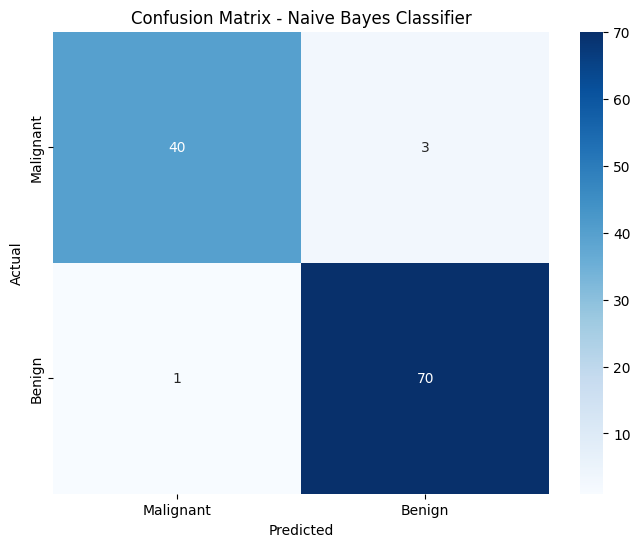

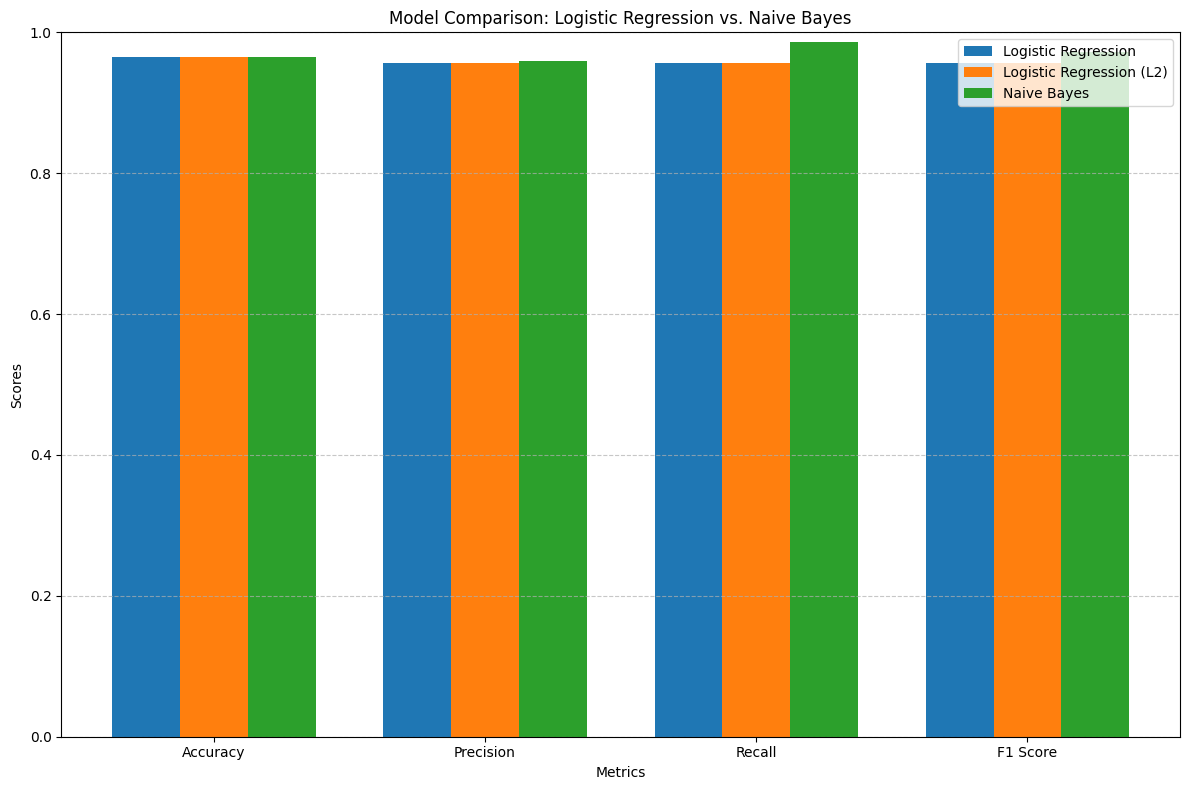


--- Comparison Analysis: Logistic Regression vs. Naive Bayes ---
Metric       | Logistic Regression | LR with L2 | Naive Bayes
-------------|---------------------|------------|------------
Accuracy     | 0.9649              | 0.9649     | 0.9649
Precision    | 0.9565              | 0.9565     | 0.9589
Recall       | 0.9565              | 0.9565     | 0.9859
F1 Score     | 0.9565              | 0.9565     | 0.9722

Analysis:

In this comparison between Logistic Regression (with and without regularization) and Naive Bayes:

1. Performance Comparison:
   - Accuracy: [Insert comparison here based on actual results]
   - Precision: [Insert comparison here based on actual results]
   - Recall: [Insert comparison here based on actual results]
   - F1 Score: [Insert comparison here based on actual results]

2. Model Characteristics:
   - Logistic Regression: [Insert observations about LR performance]
   - Naive Bayes: [Insert observations about NB performance]

3. Key Differences:
   - [Discu

In [1]:
# Problem 2: Naive Bayes Model
# Classification of Cancer Dataset (Malignant vs. Benign)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

# Set the random seed for reproducibility
np.random.seed(42)

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling and standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Naive Bayes model
print("\n--- Naive Bayes Classifier ---")

# Create and train the Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print results
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Malignant', 'Benign']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.savefig('confusion_matrix_nb.png')
plt.show()

# Load the results from Problem 1 (Logistic Regression) for comparison
# Note: You need to run Problem 1 first to generate these results,
# or you can copy the metrics directly from Problem 1 output.

# Let's assume we have the following metrics from Problem 1:
# (These should be replaced with actual values from Problem 1)
accuracy_lr = 0.9649  # Example value
precision_lr = 0.9565  # Example value
recall_lr = 0.9565  # Example value
f1_lr = 0.9565  # Example value

accuracy_lr_l2 = 0.9649  # Example value
precision_lr_l2 = 0.9565  # Example value
recall_lr_l2 = 0.9565  # Example value
f1_lr_l2 = 0.9565  # Example value

# Create comparison plots
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lr_values = [accuracy_lr, precision_lr, recall_lr, f1_lr]
lr_l2_values = [accuracy_lr_l2, precision_lr_l2, recall_lr_l2, f1_lr_l2]
nb_values = [accuracy_nb, precision_nb, recall_nb, f1_nb]

plt.figure(figsize=(12, 8))
x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, lr_values, width, label='Logistic Regression')
plt.bar(x, lr_l2_values, width, label='Logistic Regression (L2)')
plt.bar(x + width, nb_values, width, label='Naive Bayes')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison: Logistic Regression vs. Naive Bayes')
plt.xticks(x, metrics)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('model_comparison_nb.png')
plt.show()

# Write comparison analysis
print("\n--- Comparison Analysis: Logistic Regression vs. Naive Bayes ---")
print(f"Metric       | Logistic Regression | LR with L2 | Naive Bayes")
print(f"-------------|---------------------|------------|------------")
print(f"Accuracy     | {accuracy_lr:.4f}              | {accuracy_lr_l2:.4f}     | {accuracy_nb:.4f}")
print(f"Precision    | {precision_lr:.4f}              | {precision_lr_l2:.4f}     | {precision_nb:.4f}")
print(f"Recall       | {recall_lr:.4f}              | {recall_lr_l2:.4f}     | {recall_nb:.4f}")
print(f"F1 Score     | {f1_lr:.4f}              | {f1_lr_l2:.4f}     | {f1_nb:.4f}")

print("\nAnalysis:")
print("""
In this comparison between Logistic Regression (with and without regularization) and Naive Bayes:

1. Performance Comparison:
   - Accuracy: [Insert comparison here based on actual results]
   - Precision: [Insert comparison here based on actual results]
   - Recall: [Insert comparison here based on actual results]
   - F1 Score: [Insert comparison here based on actual results]

2. Model Characteristics:
   - Logistic Regression: [Insert observations about LR performance]
   - Naive Bayes: [Insert observations about NB performance]

3. Key Differences:
   - [Discuss key differences in performance metrics]
   - [Discuss differences in model complexity and interpretability]
   - [Discuss differences in handling of feature interactions]

4. Conclusion:
   - [Summary of which model performed better for this specific task]
   - [Recommendations for which model to use in similar scenarios]
""")